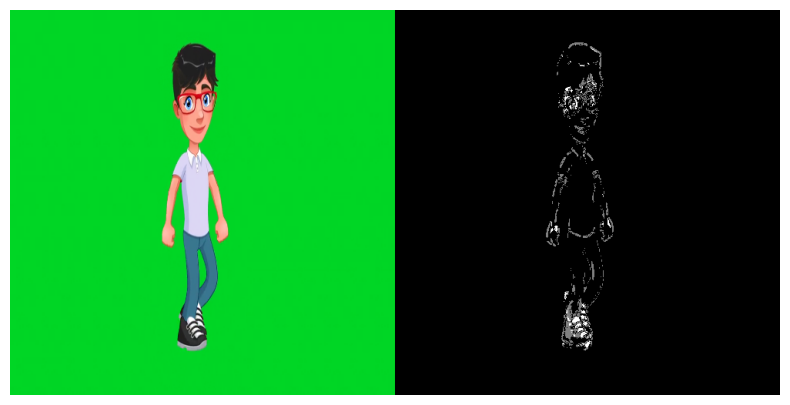

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def background_subtraction(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Unable to open video.")
        return

    bg_subtractor = cv2.createBackgroundSubtractorMOG2(detectShadows=True)

    while True:
        ret, frame = cap.read()
        if not ret or frame is None:
            break

        original_frame = frame.copy()

        # Convert to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Resize both frames to 500x500
        gray_frame = cv2.resize(gray_frame, (500, 500))
        original_frame = cv2.resize(original_frame, (500, 500))

        # Apply Gaussian blur
        blurred_frame = cv2.GaussianBlur(gray_frame, (5, 5), 0)

        # Apply background subtraction
        fg_mask = bg_subtractor.apply(blurred_frame)

        # Convert foreground mask to 3-channel image for concatenation
        fg_mask_colored = cv2.cvtColor(fg_mask, cv2.COLOR_GRAY2BGR)

        # Ensure both frames have the same size before concatenation
        combined = cv2.hconcat([original_frame, fg_mask_colored])

        # Convert BGR to RGB for correct display in Matplotlib
        combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

        # Clear previous output and display new frame
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.imshow(combined_rgb)
        plt.axis("off")
        plt.show()

    # Release resources
    cap.release()

# Run the function with your video file path
background_subtraction("ABC.mp4")



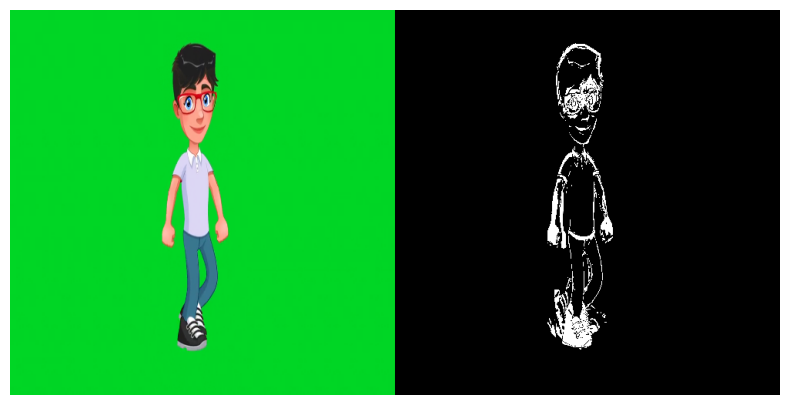

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def background_subtraction_by_averaging(video_path, learning_rate=0.01):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Unable to open video.")
        return

    background = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        original_frame = frame.copy()
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray_frame = cv2.resize(gray_frame, (500, 500))

        if background is None:
            background = gray_frame.astype("float")
            continue

        cv2.accumulateWeighted(gray_frame, background, learning_rate)
        diff_frame = cv2.absdiff(gray_frame, cv2.convertScaleAbs(background))
        _, fg_mask = cv2.threshold(diff_frame, 25, 255, cv2.THRESH_BINARY)

        original_frame = cv2.resize(original_frame, (500, 500))
        fg_mask_colored = cv2.cvtColor(fg_mask, cv2.COLOR_GRAY2BGR)

        combined = cv2.hconcat([original_frame, fg_mask_colored])
        combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.imshow(combined_rgb)
        plt.axis("off")
        plt.show()

    cap.release()

background_subtraction_by_averaging("ABC.mp4")



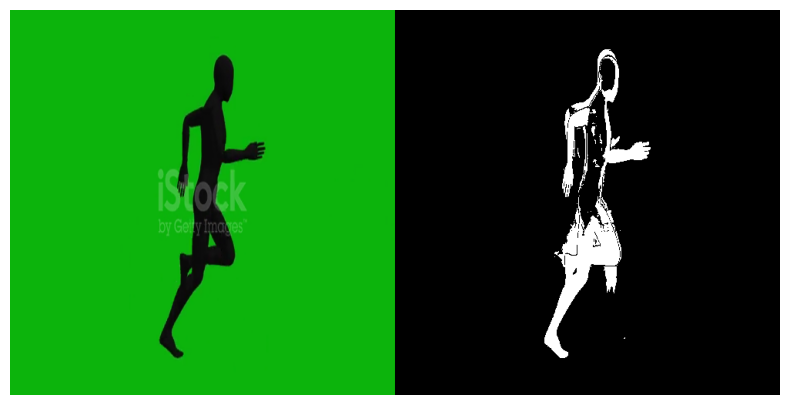

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def detect_scene_change(video_path, threshold=50000, learning_rate=0.01):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Unable to open video.")
        return

    background = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        original_frame = frame.copy()
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray_frame = cv2.resize(gray_frame, (500, 500))

        if background is None:
            background = gray_frame.astype("float")
            continue

        cv2.accumulateWeighted(gray_frame, background, learning_rate)
        diff_frame = cv2.absdiff(gray_frame, cv2.convertScaleAbs(background))
        _, fg_mask = cv2.threshold(diff_frame, 25, 255, cv2.THRESH_BINARY)

        changed_pixels = cv2.countNonZero(fg_mask)
        if changed_pixels > threshold:
            print("⚠️ Scene change detected!")

        original_frame = cv2.resize(original_frame, (500, 500))
        fg_mask_colored = cv2.cvtColor(fg_mask, cv2.COLOR_GRAY2BGR)
        combined = cv2.hconcat([original_frame, fg_mask_colored])
        combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.imshow(combined_rgb)
        plt.axis("off")
        plt.show()

    cap.release()

detect_scene_change("walk.mp4")


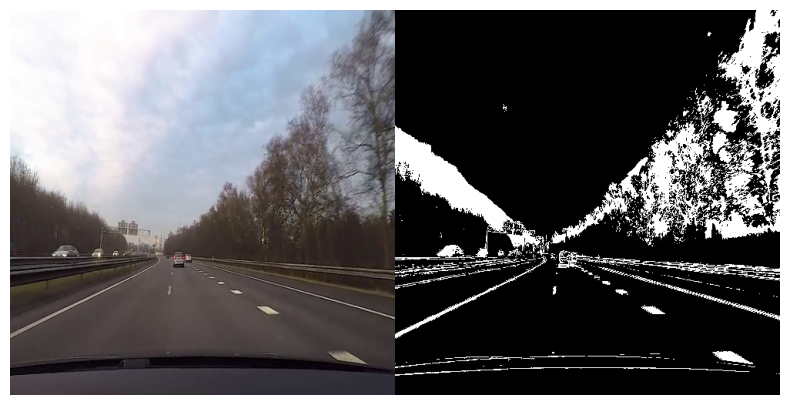

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def detect_scene_change_by_background_subtraction(video_path, change_threshold=100000, learning_rate=0.01):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Unable to open video.")
        return

    background = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        original_frame = frame.copy()
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray_frame = cv2.resize(gray_frame, (500, 500))

        if background is None:
            background = gray_frame.astype("float")
            continue

        cv2.accumulateWeighted(gray_frame, background, learning_rate)
        diff_frame = cv2.absdiff(gray_frame, cv2.convertScaleAbs(background))
        _, fg_mask = cv2.threshold(diff_frame, 25, 255, cv2.THRESH_BINARY)

        changed_pixels = cv2.countNonZero(fg_mask)
        if changed_pixels > change_threshold:
            print("⚠️ Scene change detected!")

        original_frame = cv2.resize(original_frame, (500, 500))
        fg_mask_colored = cv2.cvtColor(fg_mask, cv2.COLOR_GRAY2BGR)
        combined = cv2.hconcat([original_frame, fg_mask_colored])
        combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.imshow(combined_rgb)
        plt.axis("off")
        plt.show()

    cap.release()

detect_scene_change_by_background_subtraction("dashcam.mp4")
